# Determination of a profitable plan for the telecom company "Megaline"

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Checking-for-duplicates" data-toc-modified-id="Checking-for-duplicates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Checking for duplicates</a></span></li><li><span><a href="#Analysis-of-missing-values" data-toc-modified-id="Analysis-of-missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analysis of missing values</a></span></li><li><span><a href="#Changing-data-types,-finding-and-correcting-data-errors" data-toc-modified-id="Changing-data-types,-finding-and-correcting-data-errors-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Changing data types, finding and correcting data errors</a></span></li><li><span><a href="#Merging-tables" data-toc-modified-id="Merging-tables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Merging tables</a></span></li><li><span><a href="#Calculations" data-toc-modified-id="Calculations-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Calculations</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Statistical-hypothesis-testing" data-toc-modified-id="Statistical-hypothesis-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Statistical hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Comparison-of-the-two-tariffs-users'-revenue" data-toc-modified-id="Comparison-of-the-two-tariffs-users'-revenue-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Comparison of the two tariffs users' revenue</a></span></li><li><span><a href="#Comparison-of-revenue-from-users-in-Moscow-area--and-from-other-regions-users" data-toc-modified-id="Comparison-of-revenue-from-users-in-Moscow-area--and-from-other-regions-users-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Comparison of revenue from users in Moscow area  and from other regions users</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Results-and-Conclusion" data-toc-modified-id="Results-and-Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Conclusion</a></span></li></ul></div>

"Megaline" is a large telecom operator. The company offers its clients two prepaid plans, Smart and Ultra. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
<br>We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they used, and the number of calls they made and text messages they sent in 2018. We need to analyze the clients' behavior and **determine which prepaid plan brings in more revenue**.

**Plans description:**

<mark>**«Smart»**</mark>
1. Price: 550 rubles/month
2. Includes 500 minutes, 50 text messages and 15 GB of internet traffic
3. The cost of services after exceeding the package limits:
    - additional charge per minute: 3 rubles
    - additional charge per text message: 3 rubles
    - additional charge per 1 GB of internet traffic: 200 rubles

<mark>**«Ultra»**</mark>
1. Price: 1950 rubles/month
2. Includes 3000 minutes, 1000 text messages and 30 GB of internet traffic
3. The cost of services after exceeding the package limits:
    - additional charge per minute: 1 ruble
    - additional charge per text message: 1 ruble
    - additional charge per 1 GB of internet traffic: 150 rubles

**Note:**

Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute.
<br>For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**The purpose of the study** is to test two statistical hypotheses:
1. the average revenue from users of the Ultra and Smart calling plans differs;
2. the average revenue from users in Moscow area is different from that of the users from other regions.

**Research progress**

The study will be carried out in four steps:
1. Data exploration
2. Data preprocessing, performing calculations and adding results to a table
3. Exploratory data analysis
4. Statistical hypothesis testing

<hr>

## Data exploration
<a id='explore'></a>

In [1]:
# import of libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv',  index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
# naming of dataframes
calls.name='calls'
internet.name='internet'
messages.name='messages'
tariffs.name='tariffs'
users.name='users'

The data is split into multiple dataframes. Let's explore each one to get an initial understanding of the data:

In [4]:
# list of tables
dfs = [calls, internet, messages, tariffs, users]
# let's get the first 5 rows of each table using a for loop
for df in dfs:
    print('\nTable name:', df.name)
    display(df.head())


Table name: calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Table name: internet


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000



Table name: messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Table name: tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Table name: users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
# let's get general info about each table using a for loop
for df in dfs:
    print('\nTable name:', df.name)
    df.info()


Table name: calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Table name: internet
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB

Table name: messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data 

**Let's describe the data for each of the tables:**

The `calls` table contains the following information about calls:
- `id` — unique call identifier
- `call_date` — call date
- `duration` — call duration (in minutes)
- `user_id` — identifier of the user making the call

<mark>There are no missing values.
<br>It is necessary to change data type of the `call_date` column into *datetime* format. 
<br>In addition, the type of the `duration` column should be changed into *int* since the company rounds seconds up to minutes.</mark>

The `internet` table contains the following information about web sessions:
- `id` — unique session identifier
- `mb_used` — the amount of data spent during the session (in megabytes)
- `session_date` — web session date
- `user_id` — user identifier

<mark>There are no missing values.
<br>It is necessary to change data type of the `session_date` column into *datetime* format.</mark>

The `messages` table contains the following information about text messages:
- `id` — unique text message identifier
- `message_date` — text message date
- `user_id` — the identifier of the user sending the text

<mark>There are no missing values.
<br>It is necessary to change data type of the `message_date` column into *datetime* format.</mark>

The `tariffs` table contains the following information about prepaid plans:
- `tariff_name` — plan name
- `rub_monthly_fee` — monthly charge in rubles
- `minutes_included` — monthly minute allowance
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data amount allowance (in megabytes)
- `rub_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `rub_per_message` — price per text after exceeding the package limits
- `rub_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

<mark>There are no missing values.
<br>The columns have correct datatypes.</mark>

The `users` table contains the following information about users:
- `user_id` — unique user identifier
- `first_name` — user's name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` —  subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- `city` — user's city of residence
- `tariff` — plan name

<mark>There are a lot of missing values in the `churn_date` column. According to the description of the data, if the value is missing, the calling plan was being used when the data was extracted.
<br>It is necessary to change data type of the `churn_date` and `reg_date` columns into *datetime* format.</mark>

### Conclusion

Based on a preliminary analysis of the tables, it is needed to perform the following procedures:
- to change datatype of the columns in some of the tables into *datetime*. The procedures will be performed in section [2.3](#change_type).
- to explore missing values. The procedures will be performed in section [2.2](#missed_values).
- to check data for duplicates. The procedures will be performed in section [2.1](#duplicates).
- to merge tables into one dataframe. The procedures will be performed in section [2.4](#merge)
- to perform some calculations necessary for further analysis. The procedures will be performed in section [2.5](#computations).

<hr>

## Data preprocessing

### Checking for duplicates
<a id='duplicates'></a>

First, let's calculate how many explicit duplicates are in each table:

In [6]:
for df in dfs:
    print(f'Number of explicit duplicates in the "{df.name}" table: {df.duplicated().sum()}')

Number of explicit duplicates in the "calls" table: 0
Number of explicit duplicates in the "internet" table: 0
Number of explicit duplicates in the "messages" table: 0
Number of explicit duplicates in the "tariffs" table: 0
Number of explicit duplicates in the "users" table: 0


<mark>No explicit duplicates were found in the tables.</mark>

Let's check for implicit duplicates in the `users` table in the following columns: 
- with the name of the city of residence (`city`), 
- as well as with the name of the plan (`tariff`). 

The presence of implicit duplicates in other columns is considered unlikely.

In [7]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [8]:
users['tariff'].sort_values().unique()

array(['smart', 'ultra'], dtype=object)

<mark>No implicit duplicates were found in the tables as well.</mark>

### Analysis of missing values 
<a id='missed_values'></a>

In the [Data exploration](#explore) section we identified missing values only in the `churn_date` column of the `users` table. 
<br>First, let's calculate how many missing values are in this column.

In [9]:
users['churn_date'].isna().agg(['sum', 'mean'])

sum     462.000
mean      0.924
Name: churn_date, dtype: float64

There are a lot of missing values - 92% of all values in this column are missing.
<br>According to the description of the data, if the value is missing, the calling plan was being used when the data was extracted.
<br>Thus, <mark>there is no need to replace these missing values in this case.</mark>

### Changing data types, finding and correcting data errors
<a id='change_type'></a>

Let's change the datatype from *object* to *datetime* in the following columns:
- `call_date` (the `calls` table)
- `session_date` (the `internet` table)
- `message_date` (the `messages` table)
- `churn_date` and  `reg_date` (the `users` table)

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

We know, that Megaline rounds seconds of each individual call up to minutes: even if the call lasted just one second, it will be counted as one minute. Therefore, in the `calls` table, the data in the `duration` column should be rounded up and converted to the *int* format:

In [11]:
calls['duration'] = np.ceil(calls['duration']).astype('int64')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [12]:
# let's check the results of datatype change
for df in dfs:
    print('\nTable name:', df.name)
    df.info()


Table name: calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB

Table name: internet
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7

<mark>The data types have been converted where necessary.</mark>

Next, let's check for errors in the data:

In [13]:
users['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

It is quite logical that the age of clients starts from 18 years. No errors were found in the `age` column.

In [14]:
calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

The minimum call duration is zero. This is not a mistake: calls with zero duration represent missed calls, so we don't need to delete them.

In [15]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [16]:
internet[internet['mb_used'] == 0]

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499
149381,1499_142,0.0,2018-11-01,1499
149383,1499_144,0.0,2018-11-27,1499
149386,1499_147,0.0,2018-10-21,1499


The minimum amount of web traffic spent per session is zero. It is possible that users did not use the mobile Internet on some days, however, these lines do not carry a semantic load and can be deleted:

In [17]:
internet = internet[internet['mb_used'] != 0]

<mark>No significant data errors found.</mark>

### Merging tables
<a id='merge'></a>

Let's prepare tables for merging by creating pivot tables by users by calendar months:

In [18]:
calls['month'] = calls['call_date'].astype('datetime64[M]')
calls_grouped = calls.groupby(['user_id', 'month']).agg({'duration':['sum', 'count']})
calls_grouped.reset_index(inplace=True)
calls_grouped.columns=['user_id', 'month', 'call_duration', 'call_quantity']
calls_grouped.head()

,user_id,month,call_duration,call_quantity
0,1000,2018-05-01,159,22
1,1000,2018-06-01,172,43
2,1000,2018-07-01,340,47
3,1000,2018-08-01,408,52
4,1000,2018-09-01,466,58


In [19]:
internet['month'] = internet['session_date'].astype('datetime64[M]')
internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'})
internet_grouped.reset_index(inplace=True)
internet_grouped.head()

/tmp/ipykernel_110/77158625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet['month'] = internet['session_date'].astype('datetime64[M]')


,user_id,month,mb_used
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91


In [20]:
messages['month'] = messages['message_date'].astype('datetime64[M]')
messages_grouped = messages.groupby(['user_id', 'month']).agg({'id':'count'})
messages_grouped.reset_index(inplace=True)
messages_grouped = messages_grouped.rename(columns={'id':'messages'})
messages_grouped.head()

,user_id,month,messages
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


In [21]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Let's merge `calls`, `internet` and `messages` grouped tables into one dataframe based on `user_id` and `month` columns, and then merge them all with the `users` table based on the `user_id` column, and with the `tariffs` table based on the `tariff` column:

In [22]:
df = calls_grouped.merge(internet_grouped, on=['user_id', 'month'], how='outer')
df = df.merge(messages_grouped, on=['user_id', 'month'], how='outer')
df = df.merge(users, on='user_id', how='outer')
df = df.merge(tariffs, on='tariff', how='outer')
df.head()

,user_id,month,call_duration,call_quantity,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,159.0,22.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,172.0,43.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,340.0,47.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,408.0,52.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,466.0,58.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Let's make sure that all the data from the source tables has been added:

In [23]:
print(df['call_duration'].sum() == calls['duration'].sum())
print(df['mb_used'].sum() == internet['mb_used'].sum())
print(df['messages'].sum() == messages['id'].count())

True
True
True


Let's check the number and share of missing values in the dataframe:

In [24]:
df.isna().agg(['sum', 'mean'])

,user_id,month,call_duration,call_quantity,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
sum,0.0,2.000000,42.00000,42.00000,15.000000,499.000000,0.0,3027.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.000622,0.01306,0.01306,0.004664,0.155162,0.0,0.941231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df[df['month'].isna()]

,user_id,month,call_duration,call_quantity,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaT,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaT,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


Let's remove these 2 rows in the `month` column, and then replace the missing values in the `call_duration`, `call_quantity`, `mb_used`, `messages` columns with `0`, which means that on a particular month (`month`) the user did not make a call, or did not use the mobile Internet, or did not send a text message accordingly:

In [26]:
df = df.dropna(subset=['month'])
columns_to_replace = ['call_duration', 'call_quantity', 'mb_used', 'messages']
for column in columns_to_replace:
    df[column] = df[column].fillna(0)
df.isna().agg(['sum', 'mean'])

,user_id,month,call_duration,call_quantity,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3027.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.941817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<mark>Tables are merged into a single dataframe</mark>, and it is ready for further analysis.

### Calculations
<a id='computations'></a>

In order to calculate monthly revenue for each user, we need to convert the monthly volume of each user's web traffic into gigabytes, and also round it up:

In [27]:
df['gb_used'] = np.ceil(df['mb_used'] / 1024).astype('int64')
df.head()

,user_id,month,call_duration,call_quantity,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used
0,1000,2018-05-01,159.0,22.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,3
1,1000,2018-06-01,172.0,43.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,23
2,1000,2018-07-01,340.0,47.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,14
3,1000,2018-08-01,408.0,52.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,14
4,1000,2018-09-01,466.0,58.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,15


Let's calculate monthly revenue for each user. To do this, we need to subtract the included package limit from the total number of calls, messages and Internet traffic, and multiply the remainder by the value from the tariff plan; then add the monthly fee corresponding to the plan:

In [28]:
df['calls_income'] = np.where(df['call_duration'] > df['minutes_included'], 
                              (df['call_duration'] - df['minutes_included']) * df['rub_per_minute'], 0)
df['messages_income'] = np.where(df['messages'] > df['messages_included'], 
                                 (df['messages'] - df['messages_included']) * df['rub_per_message'], 0)
df['internet_income'] = np.where(df['gb_used'] > df['mb_per_month_included']/1024, 
                                 (df['gb_used'] - df['mb_per_month_included']/1024) * df['rub_per_gb'], 0)
df['income'] = df['calls_income'] + df['messages_income'] + df['internet_income'] + df['rub_monthly_fee']
df.head()

,user_id,month,call_duration,call_quantity,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,calls_income,messages_income,internet_income,income
0,1000,2018-05-01,159.0,22.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,3,0.0,0.0,0.0,1950.0
1,1000,2018-06-01,172.0,43.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,23,0.0,0.0,0.0,1950.0
2,1000,2018-07-01,340.0,47.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,14,0.0,0.0,0.0,1950.0
3,1000,2018-08-01,408.0,52.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,14,0.0,0.0,0.0,1950.0
4,1000,2018-09-01,466.0,58.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,15,0.0,0.0,0.0,1950.0


<mark>Necessary calculations added to the dataframe.</mark>

### Conclusion

The procedures necessary for further analysis were performed:
- column names and data types changed, missing values replaced;
- data from several tables merged into a single dataframe;
- the necessary calculations added to the dataframe.

We can start exploratory data analysis.

<hr>

## Exploratory data analysis

From the entire population of users, let's make two samples based on the tariff plan:

In [29]:
smart = df[df['tariff'] == 'smart']
ultra = df[df['tariff'] == 'ultra']

Let's see descriptive statistics for users of each tariff:

In [30]:
smart.drop(columns=['user_id', 'mb_used', 'age', 'messages_included', 'mb_per_month_included', 
                    'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']).describe()

,call_duration,call_quantity,messages,gb_used,calls_income,messages_income,internet_income,income
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,417.934948,58.463437,33.384029,16.328847,124.816958,17.399731,597.756842,1289.973531
std,190.313730,25.939858,28.227876,5.747061,254.035718,40.327368,736.563904,818.404367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,282.000000,40.000000,10.000000,13.000000,0.000000,0.000000,0.000000,550.000000
50%,422.000000,60.000000,28.000000,17.000000,0.000000,0.000000,400.000000,1023.000000
75%,545.000000,76.000000,51.000000,20.000000,135.000000,3.000000,1000.000000,1750.000000
max,1435.000000,198.000000,143.000000,38.000000,2805.000000,279.000000,4600.000000,6770.000000


In [31]:
ultra.drop(columns=['user_id', 'mb_used', 'age', 'messages_included', 'mb_per_month_included', 
                    'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']).describe()

,call_duration,call_quantity,messages,gb_used,calls_income,messages_income,internet_income,income
count,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.000000,985.000000
mean,526.623350,73.392893,49.363452,19.494416,0.0,0.0,120.152284,2070.152284
std,317.606098,43.916853,47.804457,9.853511,0.0,0.0,376.187114,376.187114
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1950.000000
25%,284.000000,41.000000,6.000000,12.000000,0.0,0.0,0.000000,1950.000000
50%,518.000000,74.000000,38.000000,19.000000,0.0,0.0,0.000000,1950.000000
75%,752.000000,104.000000,79.000000,27.000000,0.0,0.0,0.000000,1950.000000
max,1673.000000,244.000000,224.000000,49.000000,0.0,0.0,2850.000000,4800.000000


In [32]:
# three-sigma rule
cols = ['call_duration', 'messages', 'gb_used']
for col in cols:
    print(f'three-sigma rule for {col} for smart users:', 
          smart[col].mean()-3*np.sqrt(np.var(smart[col], ddof=1)), smart[col].mean()+3*np.sqrt(np.var(smart[col], ddof=1)))
    print(f'three-sigma rule for {col} for ultra users:', 
          ultra[col].mean()-3*np.sqrt(np.var(ultra[col], ddof=1)), ultra[col].mean()+3*np.sqrt(np.var(ultra[col], ddof=1)))

three-sigma rule for call_duration for smart users: -153.006241260281 988.8761380749961
three-sigma rule for call_duration for ultra users: -426.19494332357215 1479.4416438311864
three-sigma rule for messages for smart users: -51.299597957857145 118.06765538271134
three-sigma rule for messages for ultra users: -94.04992027387439 192.7768238271739
three-sigma rule for gb_used for smart users: -0.912334688927789 33.57002872212654
three-sigma rule for gb_used for ultra users: -10.066117858876058 49.054950346185706


The average monthly number of minutes for `ultra` users is 109 minutes more than for `smart` users (527 and 418 minutes/month, respectively).
<br>Standard deviation of minutes per month for `ultra` users is also higher than for `smart` users by 127 minutes/month (318 and 191 minutes/month respectively).
<br><mark>According to three-sigma rule **practically all users (about 99%) of `ultra` and `smart` plans need only 1480 and 989 minutes per month respectively**, i.е. almost all users of `ultra` plan require 491 more minutes of conversation per month than users of `smart` plan.</mark>

The average monthly number of texts for `ultra` users is 16 messages more than for `smart` users (50 and 34 texts/month, respectively).
<br>Standard deviation of texts per month for `ultra` users is also higher than for `smart` users by 19 texts/month (48 and 29 texts/month respectively).
<br><mark>According to three-sigma rule **practically all users (about 99%) of `ultra` and `smart` plans need only 193 and 119 text messages per month respectively**, i.е. almost all users of `ultra` plan require 74 more texts per month than users of `smart` plan.</mark>

The average monthly volume of web traffic for `ultra` users is 3 GB more than for `smart` users (20 and 17 GB/month, respectively).
<br>Standard deviation of monthly web traffic for `ultra` users is also higher than for `smart` users by 4 GB/month (10 and 6 GB/month respectively).
<br><mark>According to three-sigma rule **practically all users (about 99%) of `ultra` and `smart` plans need only 50 and 34 GB of web traffic per month respectively**, i.е. almost all users of `ultra` plan require 16 more GB of Internet traffic per month than users of `smart` plan.</mark>

The average income from `ultra` users is 780 rubles more than from `smart` users (2070 and 1290 rubles/month, respectively).

Let's create histograms for calls, messages and the volume of Internet traffic, and income for each tariff:

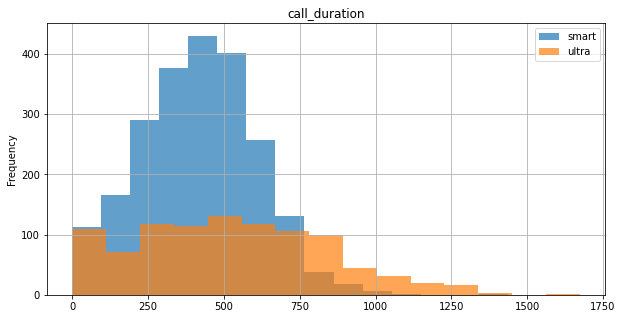

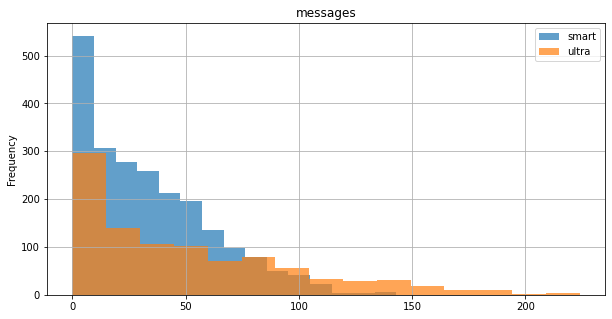

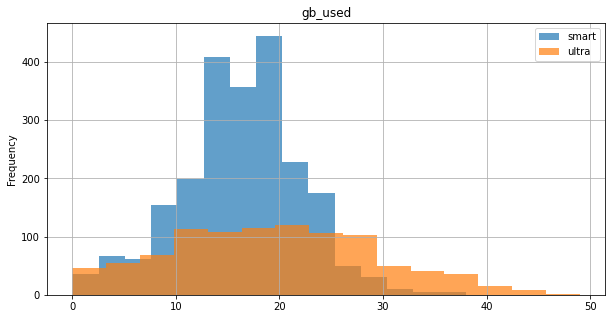

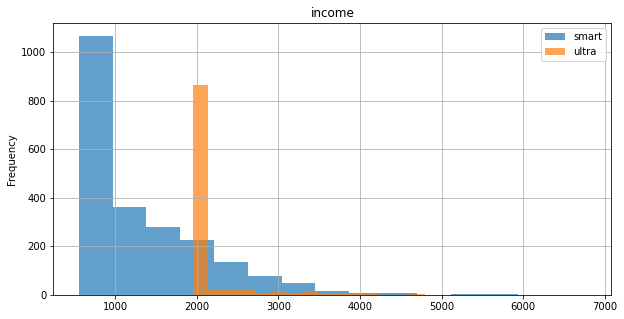

In [33]:
columns = ['call_duration', 'messages', 'gb_used', 'income']
for column in columns:
    ax = smart.plot(
        kind='hist',
        y=column,
        bins=15,
        alpha=0.7,
        label='smart',
    )
    ultra.plot(
        kind='hist',
        y=column,
        bins=15,
        alpha=0.7,
        label='ultra',
        ax=ax,
        grid=True,
        legend=True,
        title=column,
        figsize=(10,5)
    )

<mark>The histograms above confirm our calculations</mark>: the peaks on the graphs of each parameter (calls, messages and Internet traffic) for `ultra` users are smoother and flatter than for `smart` users, which means that the variance of the considered parameters is greater for `ultra` users than for `smart` users.
<br>Besides, **for all considered parameters, datasets of `ultra` users are skewed to the right** (i.e., datasets with positive skew), and **datasets of `smart` users for `call_duration` and `gb_used ` are skewed to the left** (i.e. datasets with negative skew), and the dataset **for `messages` is skewed to the right**.
<br>It can also be seen from the graphs that <mark>the number of `smart` users is more than 2 times higher than the number of `ultra` users</mark>.
<br>At the same time, <mark>the amount (x-axis) of each of the parameters (calls, messages and Internet traffic) for `ultra` users is greater than for `smart` users</mark>.

### Conclusion

The number of `smart` users is more than 2 times higher than the number of `ultra` users.

The average monthly amount of minutes, messages and Internet traffic for `ultra` users is higher than for `smart` users.

At the same time, for almost all `ultra` users (about 99%) it is enough a month for about:
- 1480 minutes of calls (included package limit is 3000 minutes),
- 193 messages (included package limit is 1000 messages),
- 50 GB of internet (included package limit is 30 GB).

Thus, for almost all `ultra` users, **a monthly package for calls and texts is enough, but included Internet package is not enough**.

For almost all `smart` users (about 99%) it is enough a month for about:
- 989 minutes of calls (included package limit is 500 minutes),
- 119 messages (included package limit is 50 messages),
- 34 GB internet (included package limit is 15 GB).

Thus, for some `smart` users **a monthly package for calls, texts and Internet is not enough**, and the volume of actually used services exceeds the included package limit by an average of about 2 times.

<hr>

## Statistical hypothesis testing

### Comparison of the two tariffs users' revenue

We need to test the hypothesis that the average monthly revenue from `ultra` and `smart` users differs.
<br>Let's formulate **H₀**: the average revenue from `ultra` users is **equal** to the average revenue from `smart` users.
<br>Then the **two-tailed alternative hypothesis H₁**: the average revenue from `ultra` users is **not equal** to the average revenue from `smart` users.
<br>The null hypothesis is rejected if the probability of obtaining the mean that is available in the sample data is too small.
<br>Let's set the critical level of statistical significance to 0.01.
<br>Since the samples are of different sizes, we will specify the equal_var=False parameter, which means that the variances of the populations are different.

In [34]:
# testing the hypothesis that the mean of two populations is equal
alpha = .01
results = st.ttest_ind(
    smart['income'], 
    ultra['income'], 
    equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("reject H₀")
else:
    print("do not reject H₀")

p-value: 4.2606313931076085e-250
reject H₀


The resulting p-value indicates that the probability of getting this or more difference randomly is 0%.
<br>We can conclude that <mark>the average revenue of `ultra` users is not equal to the average revenue of `smart` users</mark>. This conclusion sounds logical, because, as we found out earlier, on average, the amount of services sufficient for most `smart` users exceeds the included package limits for all services (calls, texts and Internet), which means that some users are forced to pay extra for using services in excess package limits. <br>But on the other hand, the cost of the `ultra` package is 3.5 times higher than the cost of the `smart` package, and this revenue is guaranteed. In turn, the payment in excess of the package limits is not so stable and depends on specific circumstances, and not all users use services above the package limits on a regular basis.

Let's check, one-sided to the left hypothesis that the average revenue of `smart` users is less than the guaranteed amount of revenue of `ultra` users (the monthly fee for using `ultra` is 1950 rubles).
<br>Let's formulate **H₀**: the average revenue from `smart` users is **equal** to the guaranteed revenue from `ultra` users, i.е. 1950 rubles.
<br>Then **left-sided alternative hypothesis H₁**: the average revenue from `smart` users is **less** than 1950 rubles.
<br>The null hypothesis is rejected if the sample mean is significantly less than the expected value.
<br>Let's set the critical level of statistical significance to 0.05.

In [35]:
# left-sided hypothesis test
alpha = .05
interested_value = 1950
results = st.ttest_1samp(
    smart['income'], 
    interested_value)
print('p-value:', results.pvalue/2)
if (results.pvalue/2 < alpha) and (smart['income'].mean() < interested_value):
    print("reject H₀: average revenue from smart users is less than guaranteed revenue from ultra users")
else:
    print("do not reject H₀: average revenue from smart users is equal to guaranteed revenue from ultra users") 

p-value: 4.426197699974328e-245
reject H₀: average revenue from smart users is less than guaranteed revenue from ultra users


In [36]:
print('Average monthly revenue from smart users: ', smart['income'].mean())
print('Average monthly revenue from ultra users: ', ultra['income'].mean())

Average monthly revenue from smart users:  1289.9735307312696
Average monthly revenue from ultra users:  2070.1522842639592


Therefore, we can conclude that <mark>the average revenue of `ultra` users is greater than the average revenue of `smart` users</mark>, which means that <mark>for a telecom company, `ultra` plan is more profitable</mark> - with a higher price of the package, and <mark>the commercial department of Megaline needs to attract more customers to the `ultra` plan</mark>.

### Comparison of revenue from users in Moscow area  and from other regions users

We need to test the hypothesis that the average revenue from users in Moscow area is different from that of the users from other regions.
<br>Let's formulate **H₀**: the average revenue from Moscow area users is **equal** to the average revenue from other regions users.
<br>Then the **two-tailed alternative hypothesis H₁**: the average revenue from Moscow area users is **not equal** to the average revenue from other regions users.
<br>The null hypothesis is rejected if the probability of obtaining the mean that is available in the sample data is too small.
<br>Let's set the critical level of statistical significance to 0.01.
<br>Since the samples are of different sizes, we will specify the equal_var=False parameter, which means that the variances of the populations are different.

In [37]:
moscow = df[df['city'] == 'Москва']
other_regions = df[df['city'] != 'Москва']

In [38]:
alpha = .01
results = st.ttest_ind(
    moscow['income'], 
    other_regions['income'], 
    equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("reject H₀")
else:
    print("do not reject H₀") 

p-value: 0.5257376663729298
do not reject H₀


In [39]:
print('Average monthly revenue from Moscow area users: ', moscow['income'].mean())
print('Average monthly revenue from other regions users: ', other_regions['income'].mean())

Average monthly revenue from Moscow area users:  1546.7135842880523
Average monthly revenue from other regions users:  1524.9362274298885


The resulting p-value indicates that the probability of getting this or more difference randomly is almost 53%. This is too high probability to conclude that there is a significant difference between the average revenue by region.
<br>We can conclude that <mark>the average revenue from Moscow area users is equal to the average revenue from other regions users</mark>. This conclusion sounds logical, since the plans are the same for all regions, therefore, the revenue by users will be approximately the same for all regions, and will change more depending on the lifestyle of users than on their place of residence.

### Conclusion

Testing the hypothesis about the equality of the average revenue from users of the two plans, we came to the conclusion that the average revenue from `ultra` users is not equal to the average revenue from `smart` users.

Carried out a left-sided test, we compared the average revenue from `smart` users with the guaranteed revenue from `ultra` users in the amount of the monthly fee, i.e. 1950 rubles, and obtained that the average revenue from `smart` users is less than the average guaranteed revenue from `ultra` users.

Therefore, the `ultra` tariff (with a higher cost of the package) is more profitable for the company, and, as a result, the commercial department of Megaline needs to attract more customers to the `ultra` tariff.

Testing the hypothesis about the equality of the average revenue from Moscow users and that from other regions, we came to the conclusion that the average revenue from Moscow users is equal to the average revenue from other regions users.

## Results and Conclusion

In order to adjust the advertising budget the commercial department of the telecom operator "Megaline" wants to know which of the two plans brings in more revenue. We were provided with the data on 500 Megaline's clients: who the clients are, where they're from, which plan they used, and the number of calls they made and text messages they sent in 2018.

We loaded and examined the provided data, and then performed the following transformations:
- checked the data for duplicates - no explicit and implicit duplicates were found in the tables;
- identified a lot of missing values only in the `churn_date` column of the `users` table. We decided, that there is no need to replace these missing values, because according to the data description, if the value is missing, the calling plan was being used when the data was extracted, or in othe words, it is an active user;
- converted the data types into *datetime* in the following columns: `call_date` (the `calls` table), `session_date` (the `internet` table), `message_date` (the `messages` table), `churn_date` and  `reg_date` (the `users` table);
- rounded up and converted to the *int* format the `duration` column of the `calls` table, since "Megaline" rounds seconds of each individual call up to minutes;
- deleted rows of the `internet` table, where the amount of web traffic spent per session is zero, because it does not carry a semantic load;
- created pivot tables by users by calendar months from the `calls`, `internet` and `messages` tables;
- merged `calls`, `internet` and `messages` grouped tables into a single dataframe based on the `user_id` and `month` columns, and then merged them all with the `users` table based on the `user_id` column, and with the `tariffs` table based on the `tariff` column using outer merging;
- replaced the missing values in the `call_duration`, `call_quantity`, `mb_used`, `messages` columns with `0`, which means that on a particular month the user did not make a call, or did not use the mobile Internet, or did not send a text accordingly;
- converted the monthly volume of each user's web traffic into gigabytes, and also rounded it up;
- calculated the monthly revenue for each user.

Next, we performed the following procedures:
- analyzed the clients' behavior and noticed the following:
    - the number of `smart` users is more than 2 times higher than the number of `ultra` users.
    - the average monthly amount of minutes, messages and Internet traffic for `ultra` users is higher than for `smart` users.
    - almost all `ultra` users are satisfied with a monthly package for calls and texts, but not enough for the Internet traffic included in the package. But for some `smart` users, a monthly package limits for calls, texts and Internet traffic is not enough, and the amount of actually used services may exceed the package limits by about 2 times.
-  tested two hypotheses:
    - about the equality of the average revenue of the two tariffs users, we came to the conclusion that the average revenue from `ultra` users is not equal to the average revenue from `smart` users, and the average revenue from `smart` users is less than the average guaranteed revenue from `ultra` users in the amount of the monthly fee, i.е. 1950 rubles.
    - about the equality of the average revenue from Moscow users and that from other regions, we came to the conclusion that the average revenue from Moscow users is equal to the average revenue from other regions users.

Thus, <mark>it is expedient for Megaline's commercial department to attract more customers to the `ultra` tariff, since it is more profitable for the company in terms of obtaining guaranteed revenue (i.e., monthly fee).
<br>An advertising campaign to attract new `ultra` users should be carried out for all regions.</mark>

<hr>